### CARGA DE LIBRERIAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### CARGA DE LOS DATOS

In [2]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ";", index_col = 'id', na_values = '#N/D')
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


### Análisis Básicos

Inicio con una primera vista a la tabla y un análisis de nulos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

In [4]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
viajes                         0
carrera                        0
distancia_casa                 0
departamento                   0
satisfaccion_entorno           0
empleados                      0
nivel_laboral                  0
abandono                       0
edad                           0
estado_civil                   0
puesto                         0
salario_mes                    0
num_empresas_anteriores        0
incremento_salario_porc        0
evaluacion                     0
mayor_edad                     0
horas_extra                    0
horas_quincena                 0
satisfaccion_companeros        0
anos_experiencia               0
nivel_acciones                 0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
anos_con_m

Conclusiones:
- Las variables anos_en_puesto y conciliacion tienen demasiados nulos. Ante la imposibilidad de imputarlos, decido eliminar las variables
- Las variables sexo, educacion, satisfaccion_trabajo e implicacion poseen nulos pero en menor cantidad, por lo que es posible imputarlos tras EDA

In [5]:
df.drop(columns = ['anos_en_puesto','conciliacion'],inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


## Análisis Exploratorio de Datos
Procedo a separar las variables en "categóricas" y "numéricas", para realizar un EDA sobre cada grupo

<br>

### EDA VARIABLES CATEGÓRICAS

In [6]:
def graficos_eda_categoricas(cat):
    #Calculo el numero de filas que necesito
    from math import ceil
    filas = ceil(cat.shape[1]/2)

    #Defino el grafico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, 6*filas))

    #Aplano para iterar por el grafico como si fuera dimension 1 en lugar de 2
    ax = ax.flat

    #Bucle para  añadir graficos
    for cada, variable in enumerate(cat):
        cat [variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = 'bold')
        ax[cada].tick_params(labelsize = 12)

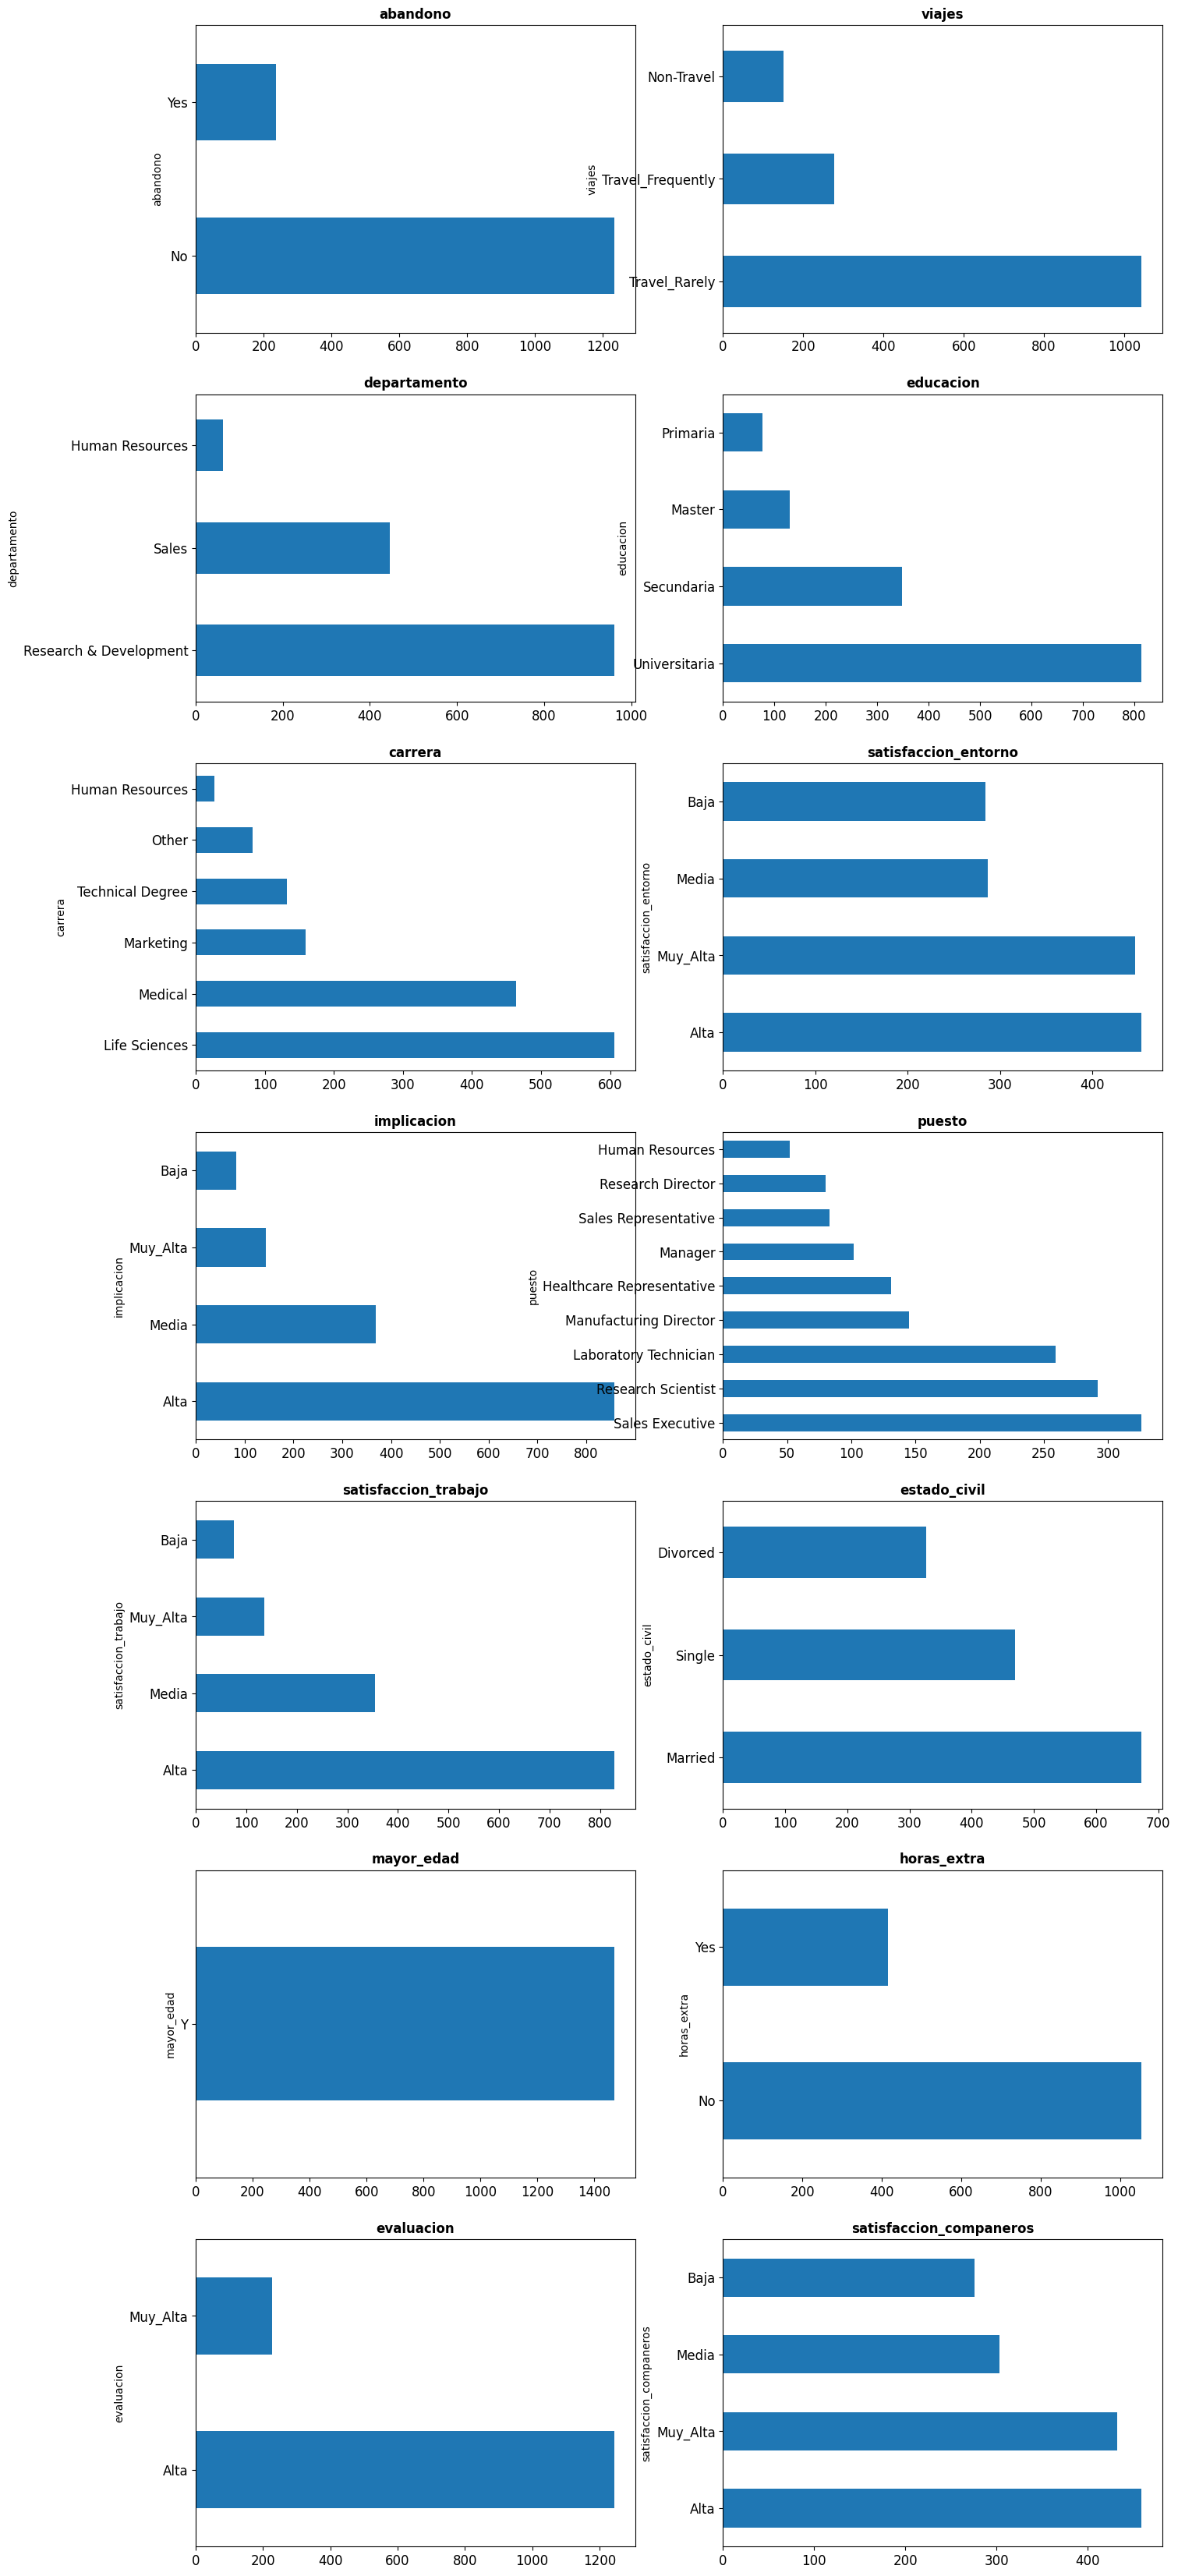

In [7]:
graficos_eda_categoricas(df.select_dtypes('O'))

Conclusiones:
- mayor_edad solo tiene un valor, por lo que es eliminada
- Sobre las imputaciones pendientes: 
    - educacion: imputar por "Universitaria"
    - satisfaccion_trabajo: imputar por "Alta"
    - implicacion: imputar por "Alta

In [8]:
df.drop(columns = "mayor_edad", inplace = True)

df['educacion]'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

### EDA VARIABLES NUMÉRICAS

In [9]:
def estadisticos_count(num):
    #Calculo describe
    estadisticos = num.describe().T
    #Añado la mediana
    estadisticos['median'] = num.median()
    #Reodenar para que la mediana este junto la media
    estadisticos = estadisticos.iloc[:, [0,1,8,2,3,4,5,6,7]]
    return estadisticos

In [10]:
estadisticos_count(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


## GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Cual es la tasa de abandono?

In [11]:
df.abandono.value_counts(normalize = True) * 100

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

### ¿Hay un perfil tipo de empleado que deja la empresa?

In [12]:
#En primer lugar, transformo la variable abandono a numérica
df['abandono'] = df['abandono'].map({'Yes': 1, 'No': 0})

In [13]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,educacion]
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Alta,Baja,80,0,8,0,6,0,5,Universitaria
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7,Secundaria
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Alta,Media,80,0,7,3,0,0,0,Secundaria
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,Alta,80,0,8,3,8,3,0,Universitaria
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Alta,Muy_Alta,80,1,6,3,2,2,2,Universitaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,Alta,80,1,17,3,5,0,3,Master
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Alta,Baja,80,1,9,5,7,1,7,Secundaria
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Muy_Alta,Media,80,1,6,0,6,0,3,Master


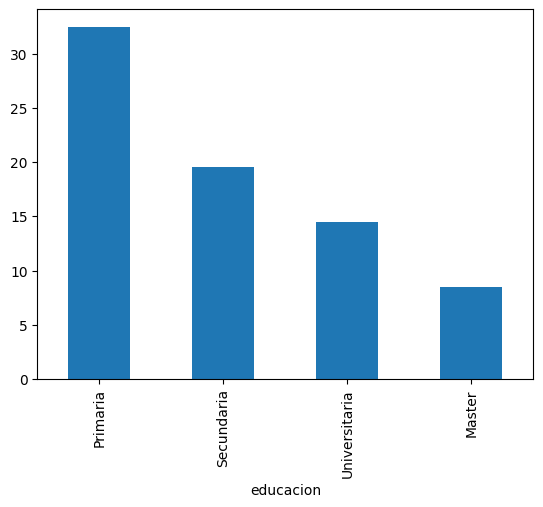

In [14]:
#Analisis por educacion
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) *100
temp.plot.bar();

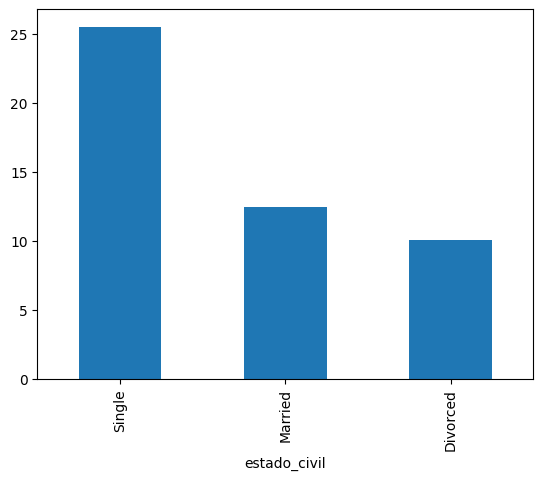

In [15]:
#Analisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) *100
temp.plot.bar();

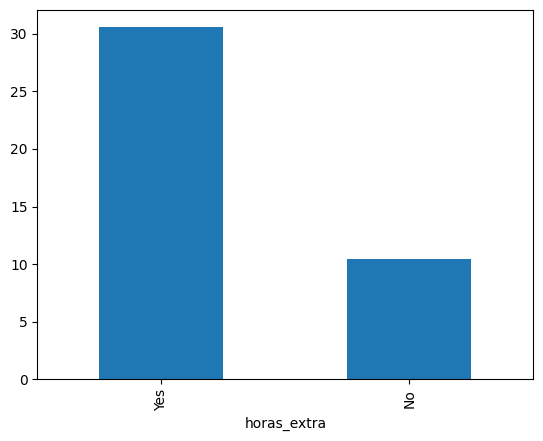

In [16]:
#Analisis por horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) *100
temp.plot.bar();

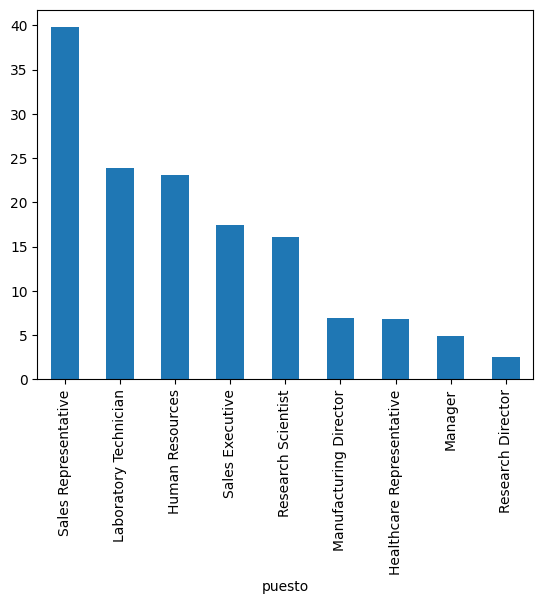

In [17]:
#Analisis por puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) *100
temp.plot.bar();

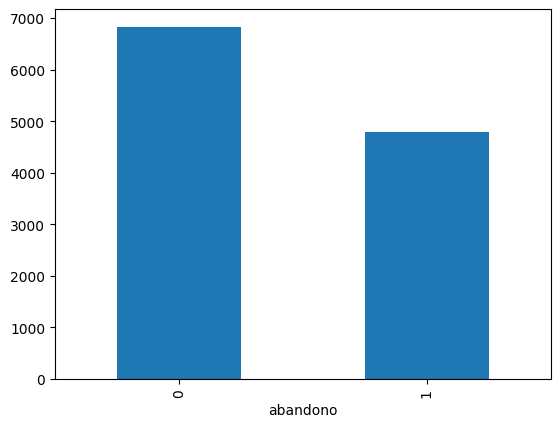

In [18]:
#Analisis por salario
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

Conclusiones:

El perfil medio del empleado que deja la empresa es:
- Bajo nivel educativo
- Soltero
- Trabaja en ventas
- Bajo salario
- Alta carga de horas extras

---
<br/>

### ¿Cual es el impacto económico de este problema?

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [19]:
#Creamos la variable salario_anual a partir de salario_mes del empleado
df['salario_anual'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes', 'salario_anual']]

,salario_mes,salario_anual
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [20]:
# Calculamos el impacto económico de cada empleado si deja la empresa

# Lista de condiciones
condiciones = [(df['salario_anual'] <= 30000),
               (df['salario_anual'] > 30000) & (df['salario_anual'] <= 50000),
               (df['salario_anual'] > 50000) & (df['salario_anual'] <= 75000),
               (df['salario_anual'] > 75000)]

# Lista de resultados
resultados = [df.salario_anual * 0.161, df.salario_anual * 0.197, df.salario_anual * 0.204, df.salario_anual * 0.21]

# Aplicamos select
df['impacto_abandono'] = np.select(condiciones, resultados, default=-999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,educacion],salario_anual,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,80,0,8,0,6,0,5,Universitaria,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,80,1,10,3,10,1,7,Secundaria,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,80,0,7,3,0,0,0,Secundaria,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,80,0,8,3,8,3,0,Universitaria,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,80,1,6,3,2,2,2,Universitaria,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,80,1,17,3,5,0,3,Master,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,80,1,9,5,7,1,7,Secundaria,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,80,1,6,0,6,0,3,Master,73704,15035.616


### ¿Cúanto nos ha costado este problema en el último año?

In [21]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

np.float64(2719005.912)

---
<br/>

### ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [22]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


---
<br/>

#### ¿Tiene sentido realizar un plan específico?
El análisis anterior mostró que los representantes de ventas son el puesto con más salida.

<br/>

#### ¿Cual sería el coste ahorrado si disminuimos la fuga?
Primero, se calcula el porcentaje de empleados que se fueron en el pasado y, posteriormente, se estima cuántos se irán este año.

In [32]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado
porc_pasado


0.39759036144578314

In [33]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)
se_iran

19

Si se asume que se puede retener al 30% (cifra hipotetica), es posible calcular cuanto dinero puede suponer

In [36]:
retenemos = int(se_iran * 0.3)

ahorro = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print (f'Se puede retener {retenemos} empleados de ventas, lo que supone un ahorro de ${ahorro}')

Se puede retener 5 empleados de ventas, lo que supone un ahorro de $37447.22424578312


Este dato es útil para conocer el monto del presupuesto que se puede destinar a acciones de retención, ya sea por departamento o perfil.

En este caso, se puede destinar $37.000 en acciones específicas para retener a representantes de ventas y, dicho gasto, se pagaría sólo con la pérdida evitada.

## MODELO DE MACHINE LEARNING

Adicional al análisis anterior, se implementará un modelo de Machine Learning que ayude a predecir la probabilidad de abandono de cada empleado en específico.

In [37]:
df_ml = df.copy()

In [38]:
df_ml.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1470 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1470 non-null   object 
 14  estado_civil 

## PREPARACIÓN DE LOS DATOS

##### Las variables categóricas se necesitan como numéricas

In [41]:
from sklearn.preprocessing import OneHotEncoder

cat = df_ml.select_dtypes('O')

ohe = OneHotEncoder(sparse_output = False)

ohe.fit(cat)

cat_ohe = ohe.transform(cat)

cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [42]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta,educacion]_Master,educacion]_Primaria,educacion]_Secundaria,educacion]_Universitaria
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Dataframe final

In [43]:
num = df.select_dtypes('number').reset_index(drop = True)

In [44]:
df_ml = pd.concat([cat_ohe, num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,incremento_salario_porc,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,11,80,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,23,80,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,15,80,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,11,80,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,12,80,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,17,80,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,15,80,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,20,80,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,14,80,0,17,3,9,0,8,64680,13194.720


## DISEÑO DE LA MODELIZACIÓN

#### Separación predictoras y target

In [45]:
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

#### Separación train y test

In [46]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

<br/>

### ENTRENAMIENTO DEL MODELO SOBRE TRAIN

In [47]:
from sklearn.tree import DecisionTreeClassifier

ac = DecisionTreeClassifier(max_depth = 4)

ac.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=4)

### PREDICCIÓN Y VALIDACIÓN SOBRE TEST

In [49]:
# Predicción

pred = ac.predict_proba(test_x)[:,1]
pred[:20]

array([0.05436893, 0.12857143, 0.15789474, 0.56      , 0.05436893,
       0.05436893, 0.12857143, 0.05436893, 0.07079646, 0.05436893,
       0.07079646, 0.12857143, 0.        , 0.6       , 0.12244898,
       0.30555556, 0.05436893, 0.12857143, 0.12857143, 0.05436893])

In [50]:
# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y, pred)

np.float64(0.709433423719138)

Como ofrece una puntuación del .71, lo tomamos como un modelo aceptable.

### INTERPRETACIÓN

#### Diagrama del árbol

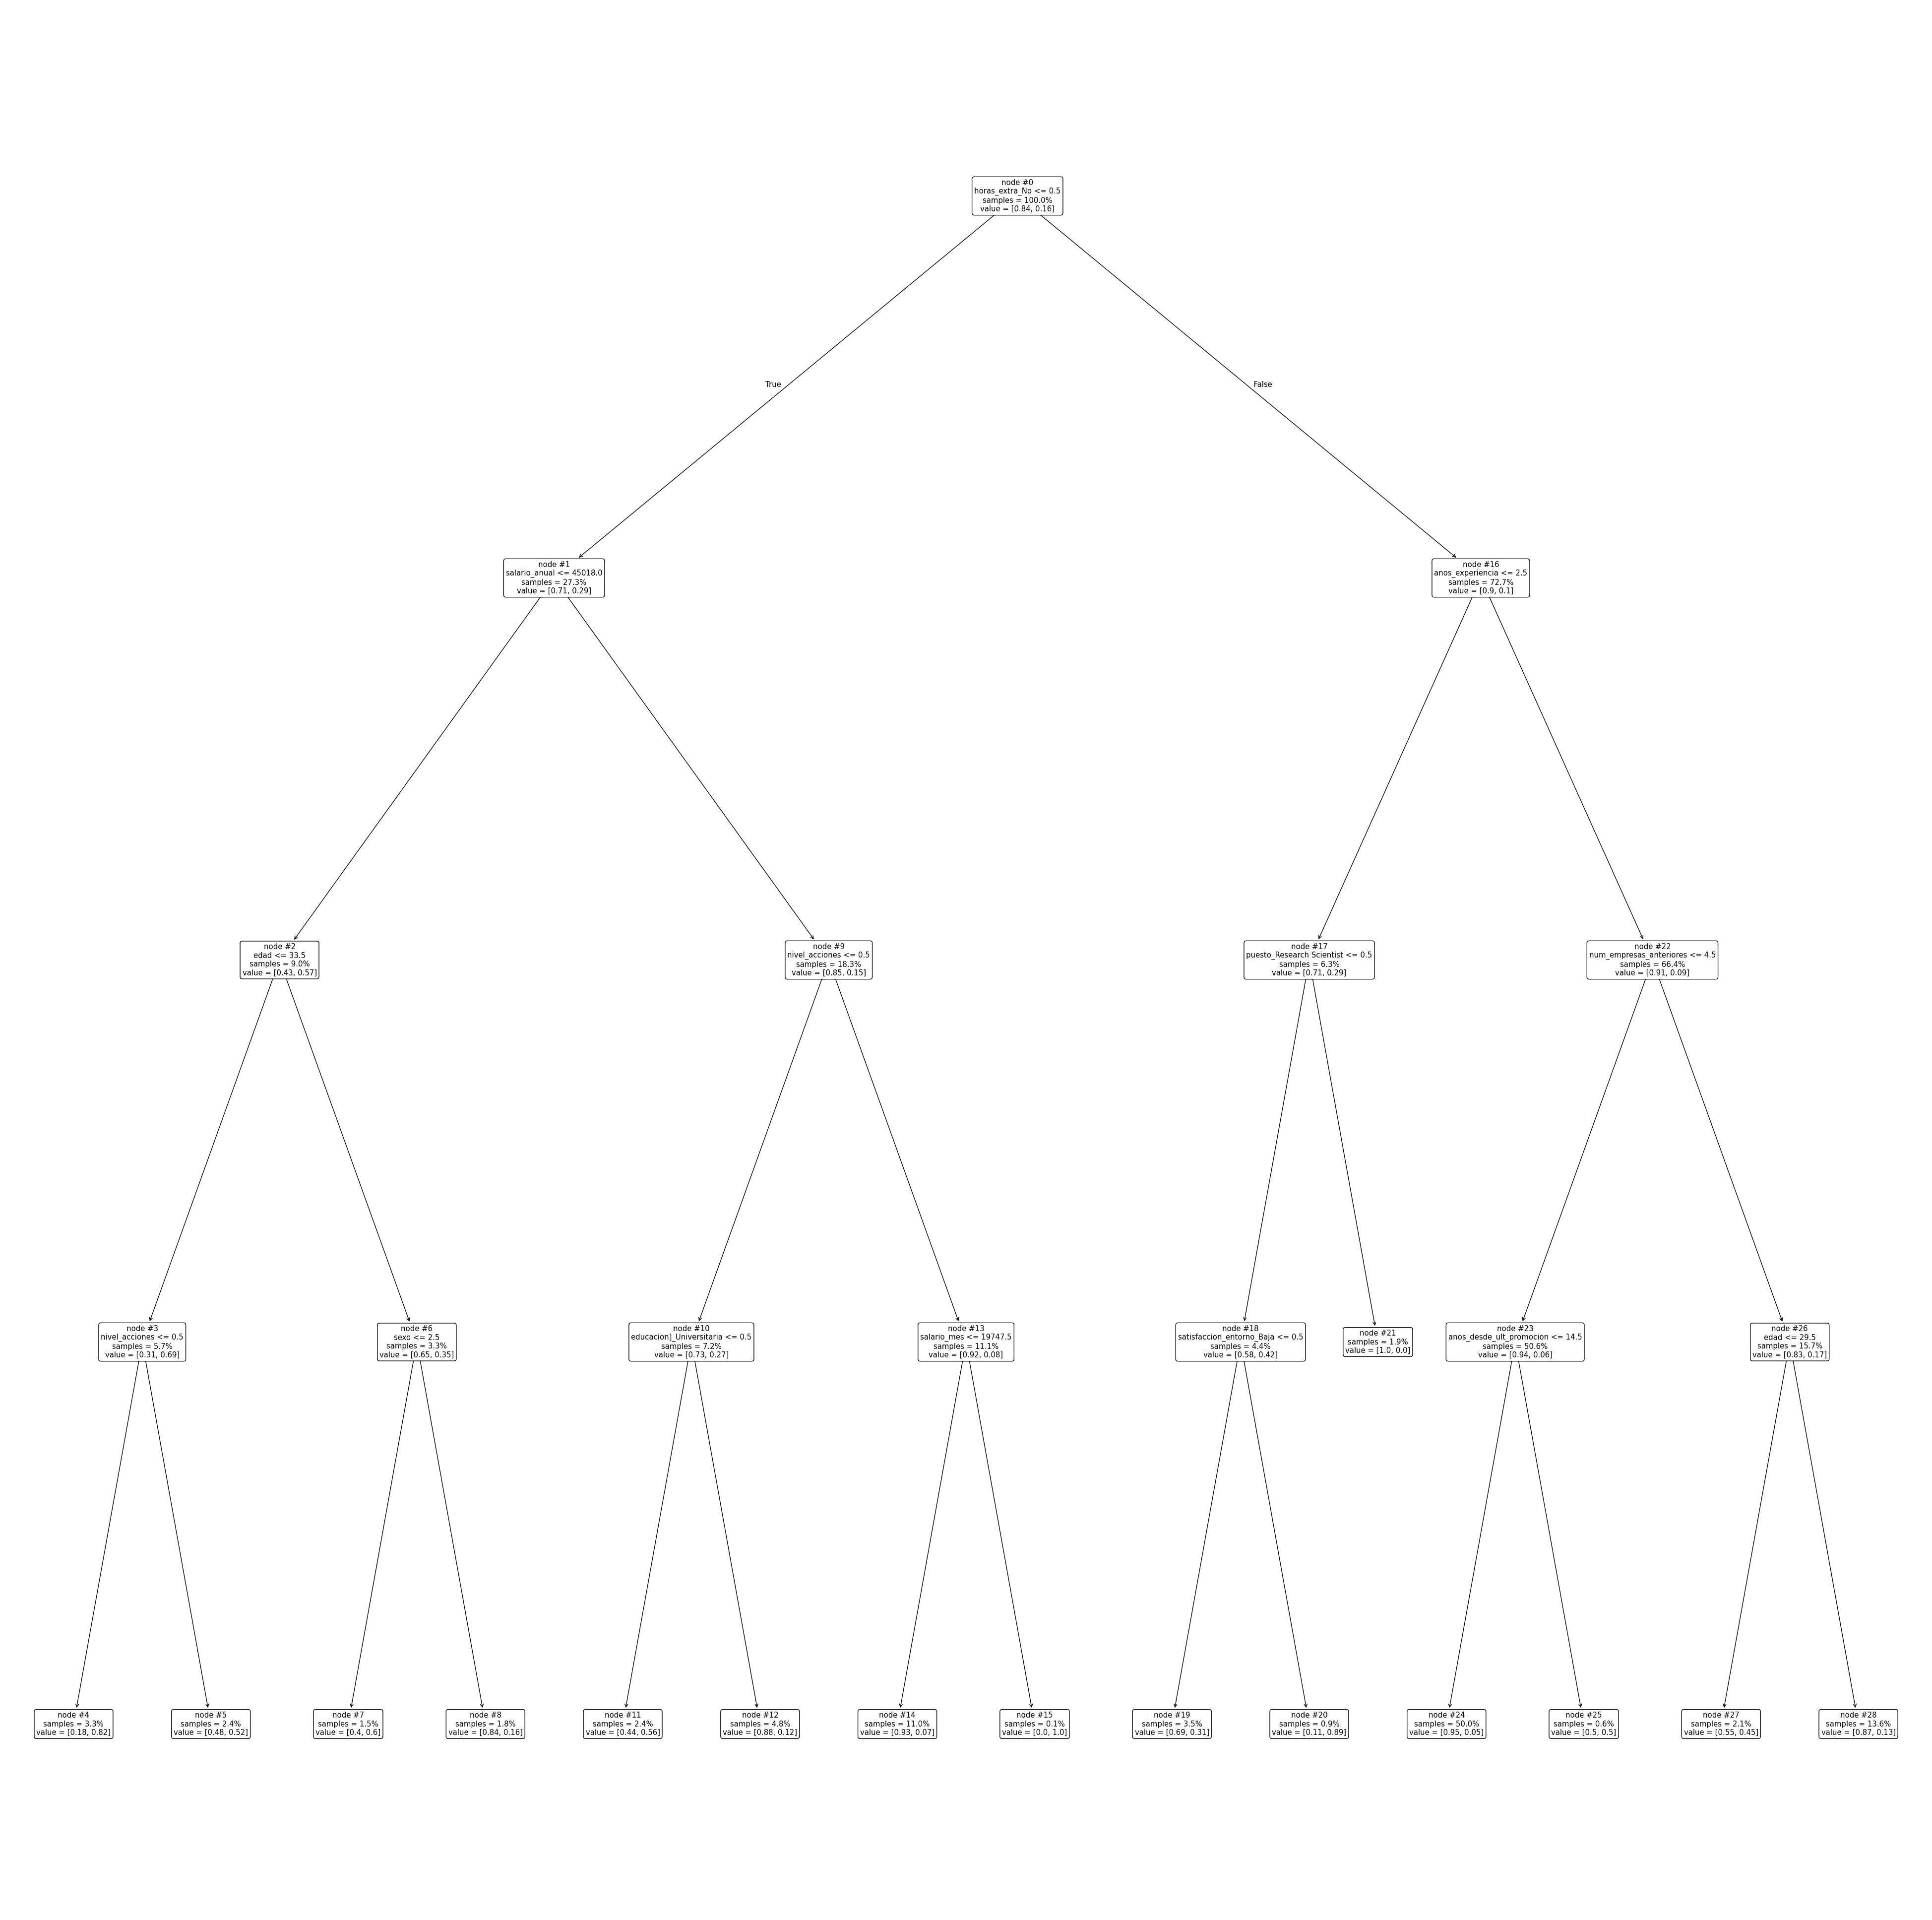

In [53]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50, 50))
plot_tree(ac,
          feature_names = test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

### Importancia de las variables

<Axes: >

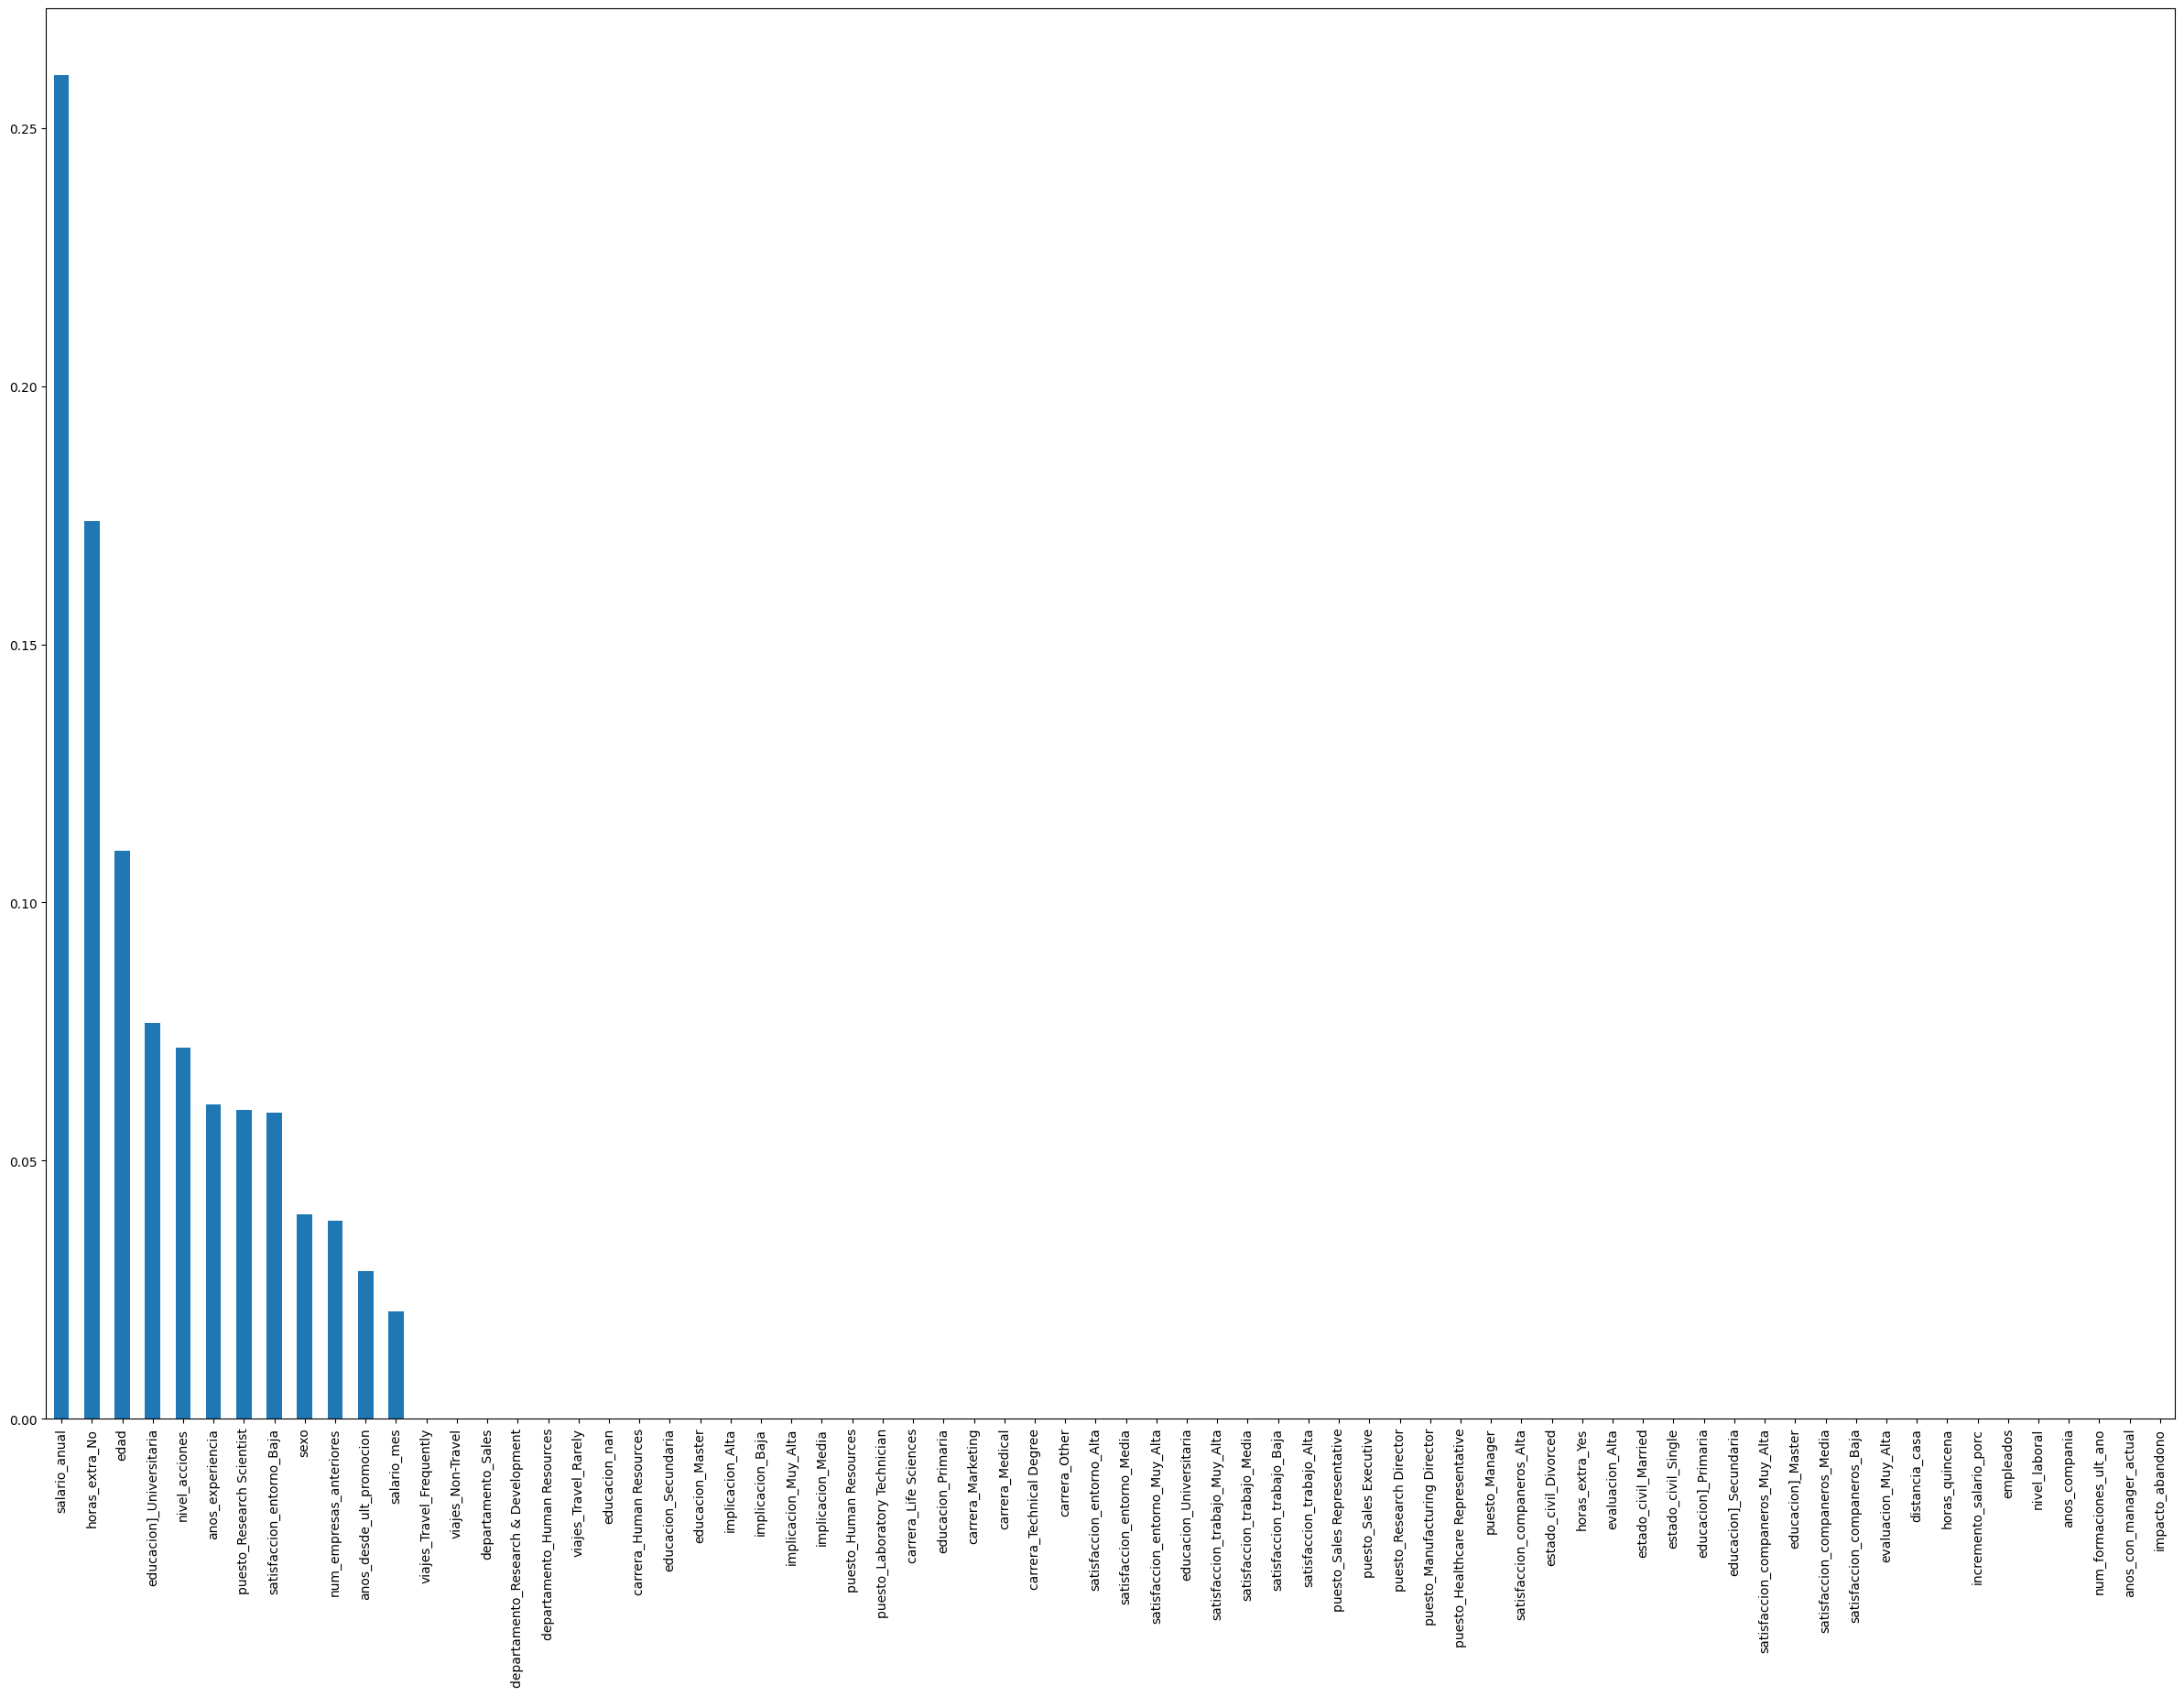

In [54]:
pd.Series(ac.feature_importances_, index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20))

## EXPLOTACIÓN

Incorporación del scoring al dataframe principal

In [56]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:,1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,educacion],salario_anual,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,0,8,0,6,0,5,Universitaria,71916,14670.864,0.122449
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,1,10,3,10,1,7,Secundaria,61560,12558.240,0.054369
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,0,7,3,0,0,0,Secundaria,25080,4037.880,0.600000
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,0,8,3,8,3,0,Universitaria,34908,6876.876,0.823529
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,1,6,3,2,2,2,Universitaria,41616,8198.352,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,1,17,3,5,0,3,Master,30852,6077.844,0.054369
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,1,9,5,7,1,7,Secundaria,119892,25177.320,0.054369
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,1,6,0,6,0,3,Master,73704,15035.616,0.070796


In [57]:
# Ejemplo de los 10 empleados con mayor probabilidad de abandono

df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,educacion],salario_anual,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1282,51,0,Travel_Frequently,Sales,9,NaN,Life Sciences,1,Muy_Alta,3.0,...,1,31,5,29,11,10,Universitaria,238164,50014.440,1.000000
787,55,1,Travel_Rarely,Research & Development,2,NaN,Medical,1,Muy_Alta,3.0,...,1,24,2,5,1,4,Universitaria,238308,50044.680,1.000000
1279,21,1,Travel_Frequently,Research & Development,10,Secundaria,Life Sciences,1,Baja,2.0,...,0,2,2,2,2,2,Secundaria,31500,6205.500,0.888889
1944,27,1,Travel_Frequently,Human Resources,22,Secundaria,Human Resources,1,Baja,2.0,...,0,1,2,1,0,0,Secundaria,34356,6768.132,0.888889
1467,34,1,Travel_Rarely,Human Resources,9,Universitaria,Technical Degree,1,Baja,3.0,...,0,2,0,2,2,2,Universitaria,32904,6482.088,0.888889
566,19,1,Travel_Rarely,Human Resources,2,Secundaria,Technical Degree,1,Baja,2.0,...,0,1,3,1,0,0,Secundaria,30768,6061.296,0.888889
55,26,1,Travel_Rarely,Research & Development,25,NaN,Life Sciences,1,Baja,NaN,...,0,1,2,1,0,1,Universitaria,27516,4430.076,0.888889
1111,28,1,Travel_Frequently,Research & Development,1,Secundaria,Medical,1,Baja,2.0,...,2,1,2,1,0,0,Secundaria,31152,6136.944,0.888889
1107,26,1,Travel_Rarely,Research & Development,21,Universitaria,Medical,1,Baja,3.0,...,1,1,0,1,0,0,Universitaria,28524,4592.364,0.888889


<Axes: title={'center': 'scoring_abandono'}, xlabel='puesto'>

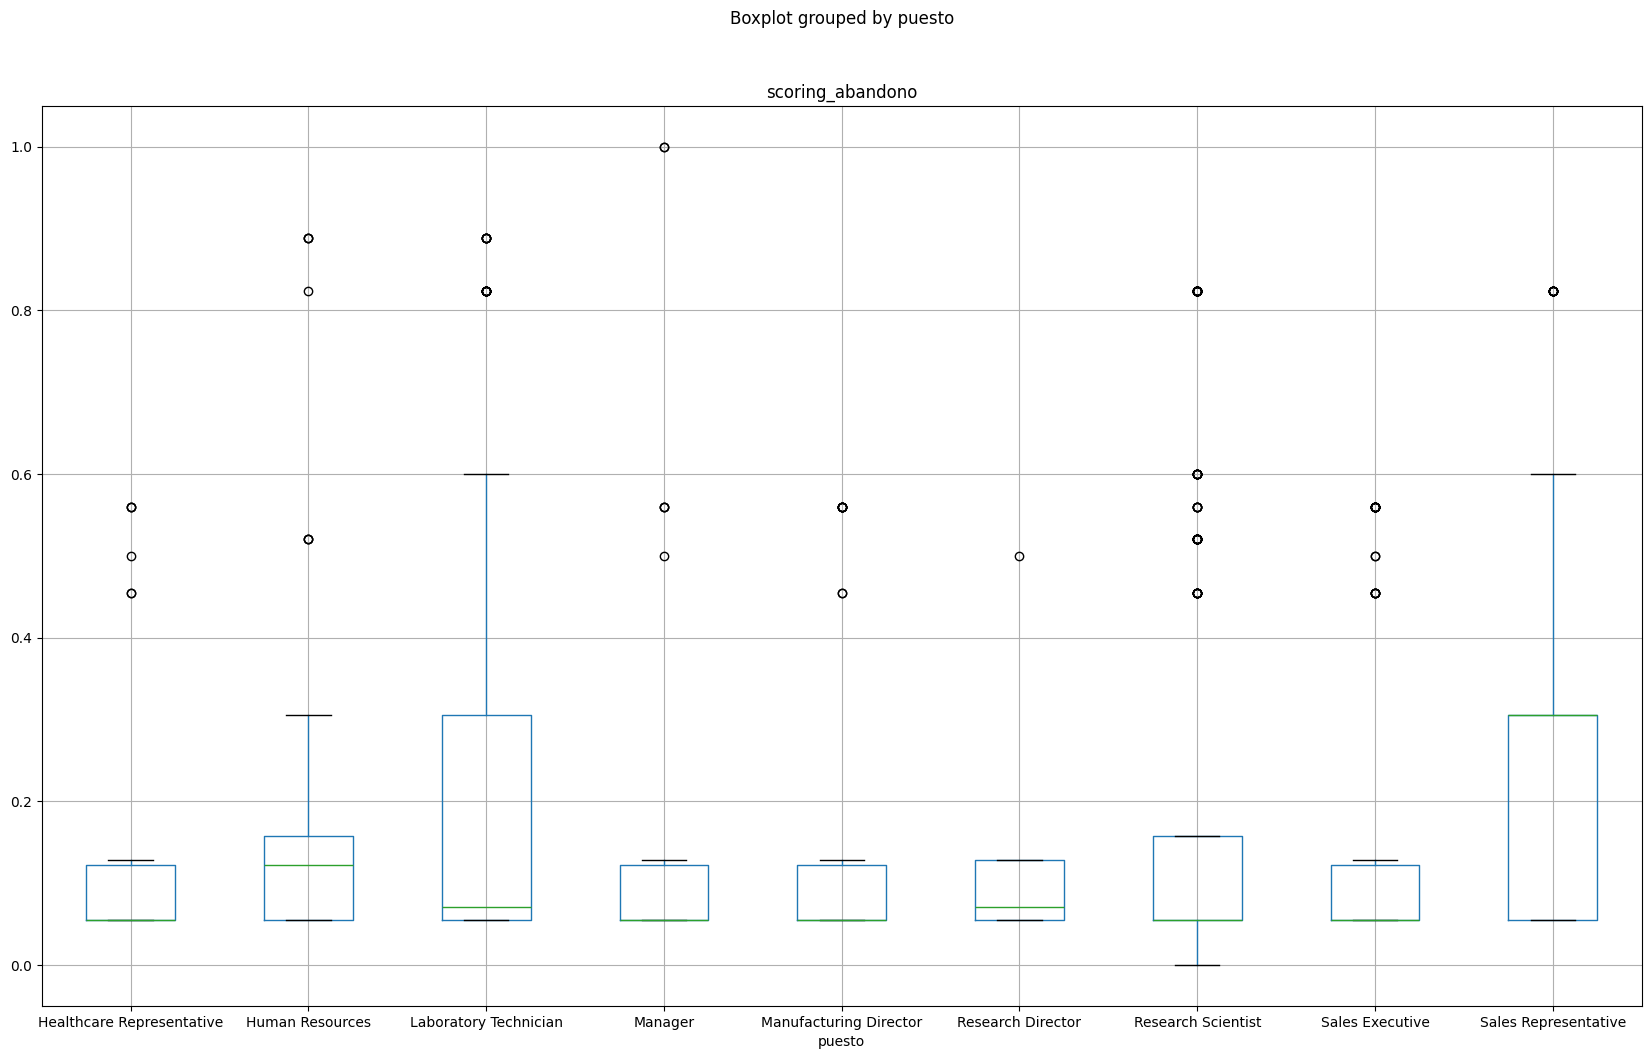

In [58]:
# Ejemplo del riesgo de dejar la empresa por puesto

df.boxplot(column = 'scoring_abandono', by = 'puesto', figsize = (20,12))

### GUARDADO DEL RESULTADO

In [59]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,educacion],salario_anual,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,0,8,0,6,0,5,Universitaria,71916,14670.864,0.122449
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,1,10,3,10,1,7,Secundaria,61560,12558.240,0.054369
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,0,7,3,0,0,0,Secundaria,25080,4037.880,0.600000
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,0,8,3,8,3,0,Universitaria,34908,6876.876,0.823529
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,1,6,3,2,2,2,Universitaria,41616,8198.352,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,1,17,3,5,0,3,Master,30852,6077.844,0.054369
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,1,9,5,7,1,7,Secundaria,119892,25177.320,0.054369
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,1,6,0,6,0,3,Master,73704,15035.616,0.070796


In [ ]:
import openpyxl as pyxl

df.to_excel('abandonoEmpleadosConScoring.xlsx')